In [1]:
import pymc as mc
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rv_continuous
from scipy.optimize import curve_fit
import copy
%run 'plotting_mcmc_ip.ipynb'


15 parameters total, arranged (approximately) from least to most complex.

right ascension
<br>
phase
<br>
coalesence phase
<br>
spin azimuthal angle

declination
<br>
inclination angle
<br>
spin polar angle


spin magnitude
<br>
distance
<br>
mass

coalesence time

In [12]:
num_events=20000

Right ascension, uniform, $\alpha \in [0,2\pi]$

/Users/RMastandrea/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


 [-----------------100%-----------------] 50000 of 50000 complete in 4.9 sec

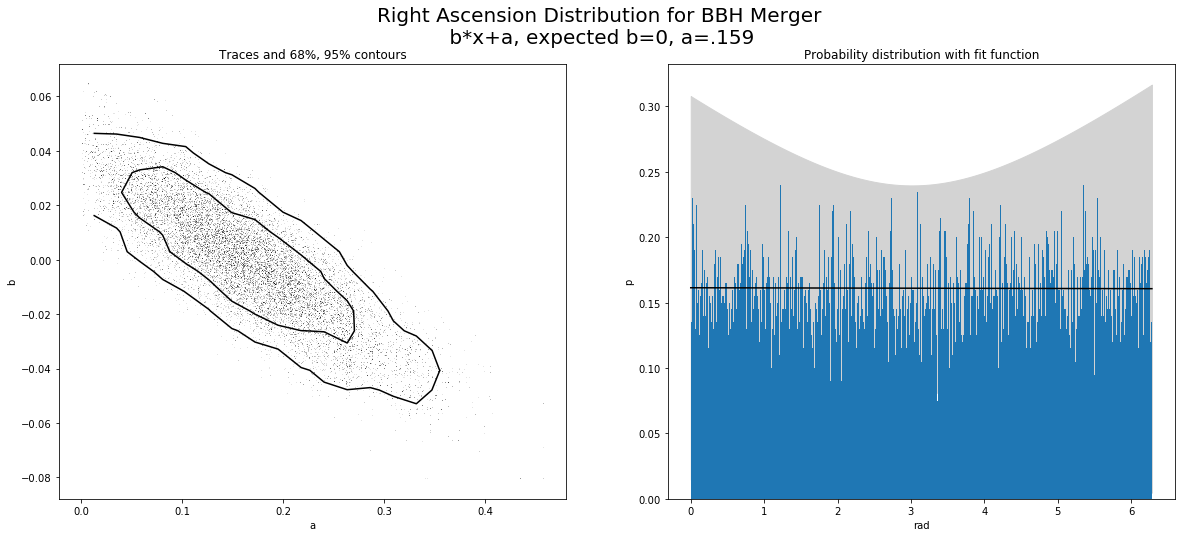

In [44]:
y_range_ra = 2*np.pi
grad_ra = 100

xbins_ra = np.linspace(0,y_range_ra,np.ceil(grad_ra*(y_range_ra)))

#random distribution
y_hist=np.array(np.random.uniform(0,2*np.pi,size=num_events))

#binning to make scatterplot to curve fit
y_scatter, bins = np.histogram(y_hist,normed=True,bins=xbins_ra)
x_scatter = xbins_ra[:-1] + 0.5 * (xbins_ra[1:] - xbins_ra[:-1])

#priors
sig = mc.Uniform("sig", 0.0, 100.0, value=1.)
a = mc.Uniform("a", 0.0, 1.0, value= .5)
b = mc.Uniform("b", -1.0, 1.0, value= 0.0)

#model
@mc.deterministic(plot=False)
def linear(x=x_scatter, a=a, b=b):
      return b*x+a

#likelihood
y = mc.Normal("y", mu=linear, tau=1.0/sig**2, value=y_scatter, observed=True)

#sampling
mcmc = mc.MCMC([y, a, b])
mcmc.sample(iter=50000, burn=20000)

# plotting
pymc_trace = [mcmc.trace('a')[:],
              mcmc.trace('b')[:]]
title="Right Ascension Distribution for BBH Merger\n b*x+a, expected b=0, a=.159"
plot_MCMC_results(y_hist, pymc_trace,model="linear",units=["rad","p"],title=title,bins=xbins_ra)
plt.show()

Phase, uniform, $\psi \in [0,2\pi]$

/Users/RMastandrea/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


 [-----------------100%-----------------] 50000 of 50000 complete in 5.4 sec

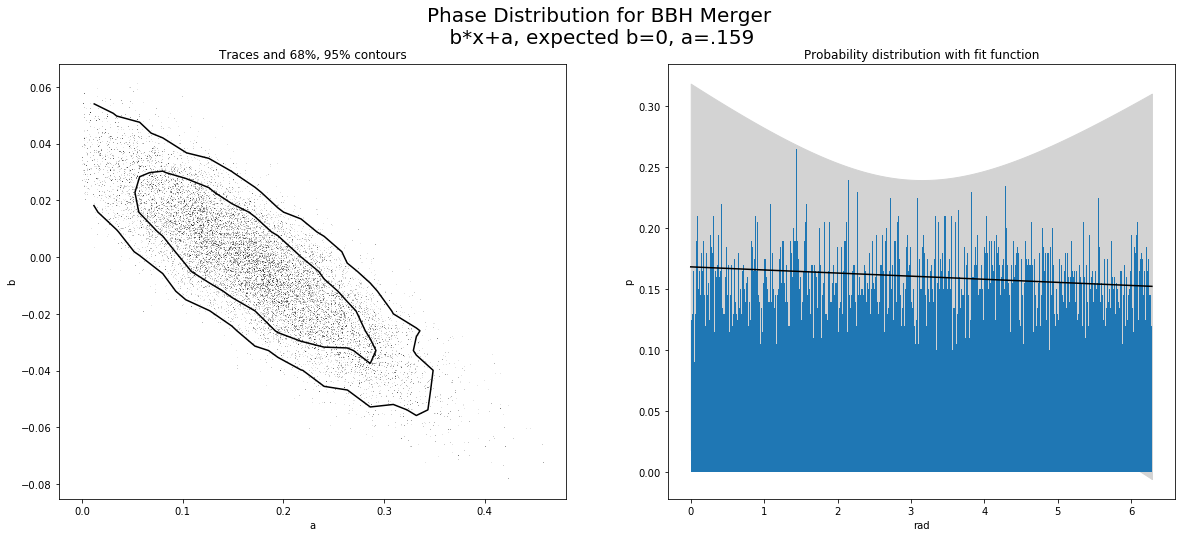

In [45]:
y_range_phase = 2*np.pi
grad_phase = 100

xbins_phase = np.linspace(0,y_range_phase,np.ceil(grad_phase*(y_range_phase)))

#random distribution
y_hist=np.array(np.random.uniform(0,2*np.pi,size=num_events))

#binning to make scatterplot to curve fit
y_scatter, bins = np.histogram(y_hist,normed=True,bins=xbins_phase)
x_scatter = xbins_phase[:-1] + 0.5 * (xbins_phase[1:] - xbins_phase[:-1])

#priors
sig = mc.Uniform("sig", 0.0, 100.0, value=1.)
a = mc.Uniform("a", 0.0, 1.0, value= .5)
b = mc.Uniform("b", -1.0, 1.0, value= 0.0)

#model
@mc.deterministic(plot=False)
def linear(x=x_scatter, a=a, b=b):
      return b*x+a

#likelihood
y = mc.Normal("y", mu=linear, tau=1.0/sig**2, value=y_scatter, observed=True)

#sampling
mcmc = mc.MCMC([y, a, b])
mcmc.sample(iter=50000, burn=20000)

# plotting
pymc_trace = [mcmc.trace('a')[:],
              mcmc.trace('b')[:]]
title="Phase Distribution for BBH Merger\n b*x+a, expected b=0, a=.159"
plot_MCMC_results(y_hist, pymc_trace,model="linear",units=["rad","p"],title=title,bins=xbins_phase)
plt.show()

Coalesence phase, uniform, $\kappa \in [0,2\pi]$

/Users/RMastandrea/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


 [-----------------100%-----------------] 50000 of 50000 complete in 5.1 sec

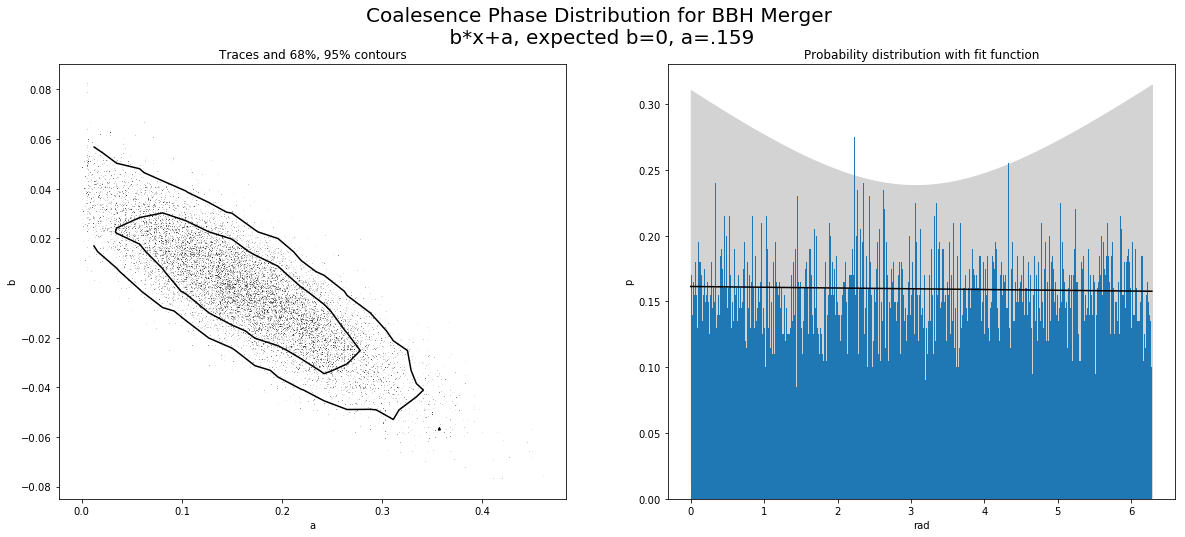

In [46]:
y_range_phase_co = 2*np.pi
grad_phase_co = 100

xbins_phase_co = np.linspace(0,y_range_phase_co,np.ceil(grad_phase_co*(y_range_phase_co)))

#random distribution
y_hist=np.array(np.random.uniform(0,2*np.pi,size=num_events))

#binning to make scatterplot to curve fit
y_scatter, bins = np.histogram(y_hist,normed=True,bins=xbins_phase_co)
x_scatter = xbins_phase_co[:-1] + 0.5 * (xbins_phase_co[1:] - xbins_phase_co[:-1])

#priors
sig = mc.Uniform("sig", 0.0, 100.0, value=1.)
a = mc.Uniform("a", 0.0, 1.0, value= .5)
b = mc.Uniform("b", -1.0, 1.0, value= 0.0)

#model
@mc.deterministic(plot=False)
def linear(x=x_scatter, a=a, b=b):
      return b*x+a

#likelihood
y = mc.Normal("y", mu=linear, tau=1.0/sig**2, value=y_scatter, observed=True)

#sampling
mcmc = mc.MCMC([y, a, b])
mcmc.sample(iter=50000, burn=20000)

# plotting
pymc_trace = [mcmc.trace('a')[:],
              mcmc.trace('b')[:]]
title="Coalesence Phase Distribution for BBH Merger\n b*x+a, expected b=0, a=.159"
plot_MCMC_results(y_hist, pymc_trace,model="linear",units=["rad","p"],title=title,bins=xbins_phase_co)
plt.show()

Spin azimuthal angles (*2), uniform, $\phi_1,\phi_2 \in [0,2\pi]$

/Users/RMastandrea/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


 [-----------------100%-----------------] 50000 of 50000 complete in 7.0 sec

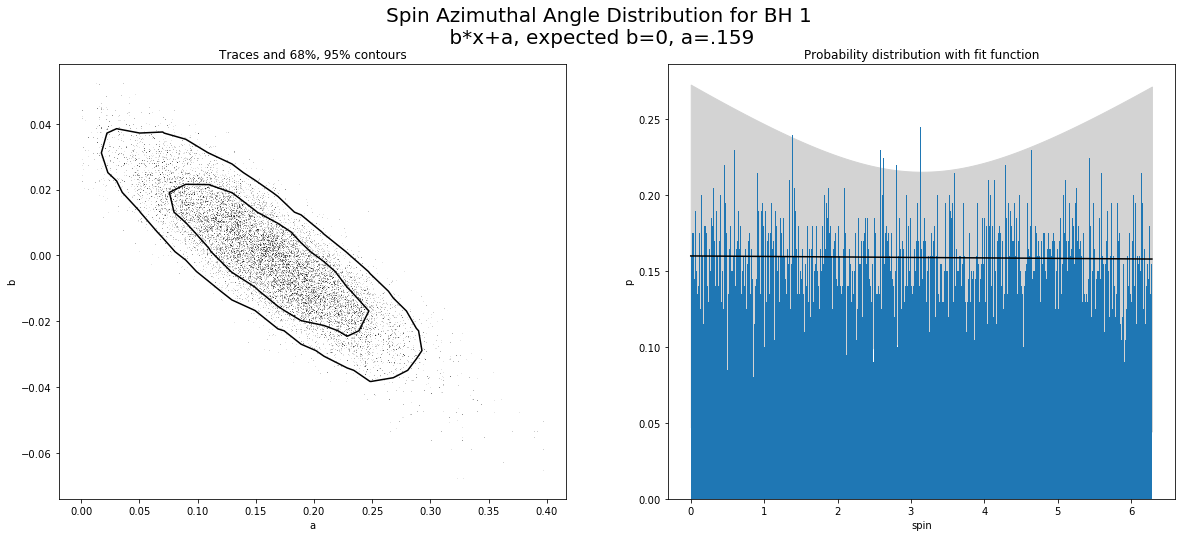

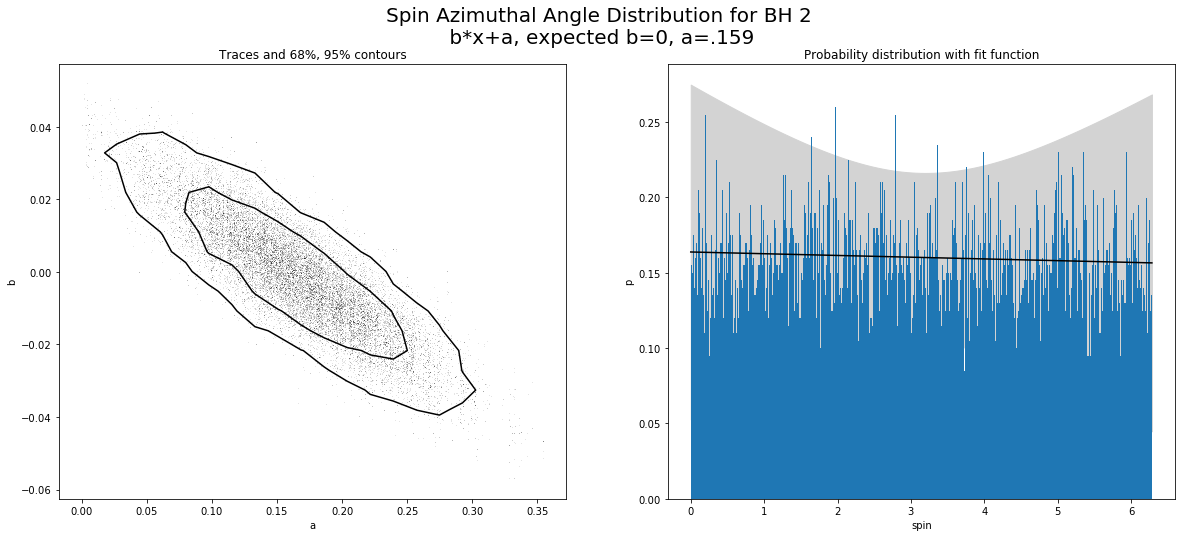

In [47]:
y_range_spin_azi = 2*np.pi
grad_spin_azi = 100

xbins_spin_azi = np.linspace(0,y_range_spin_azi,np.ceil(grad_spin_azi*(y_range_spin_azi)))

#random distribution
y_hist_1=np.array(np.random.uniform(0,2*np.pi,size=num_events))
y_hist_2=np.array(np.random.uniform(0,2*np.pi,size=num_events))

#binning to make scatterplot to curve fit
y_scatter_1, bins = np.histogram(y_hist_1,normed=True,bins=xbins_phase_co)
y_scatter_2, bins = np.histogram(y_hist_2,normed=True,bins=xbins_phase_co)
x_scatter = xbins_spin_azi[:-1] + 0.5 * (xbins_spin_azi[1:] - xbins_spin_azi[:-1])

#priors
sig = mc.Uniform("sig", 0.0, 100.0, value=1.)
a = mc.Uniform("a", 0.0, 1.0, value= .5)
b = mc.Uniform("b", -1.0, 1.0, value= 0.0)

#model
@mc.deterministic(plot=False)
def linear(x=x_scatter, a=a, b=b):
      return b*x+a

#likelihood
y_1 = mc.Normal("y", mu=linear, tau=1.0/sig**2, value=y_scatter_1, observed=True)
y_2 = mc.Normal("y", mu=linear, tau=1.0/sig**2, value=y_scatter_2, observed=True)

#sampling
mcmc_1 = mc.MCMC([y_1, a, b])
mcmc_1.sample(iter=50000, burn=20000)
mcmc_2 = mc.MCMC([y_2, a, b])
mcmc_2.sample(iter=50000, burn=20000)

# plotting
pymc_trace = [mcmc_1.trace('a')[:],
              mcmc_1.trace('b')[:]]
title="Spin Azimuthal Angle Distribution for BH 1\n b*x+a, expected b=0, a=.159"
plot_MCMC_results(y_hist_1, pymc_trace,model="linear",units=["spin","p"],title=title,bins=xbins_spin_azi)
pymc_trace = [mcmc_2.trace('a')[:],
              mcmc_2.trace('b')[:]]
title="Spin Azimuthal Angle Distribution for BH 2\n b*x+a, expected b=0, a=.159"
plot_MCMC_results(y_hist_2, pymc_trace,model="linear",units=["spin","p"],title=title,bins=xbins_spin_azi)
plt.show()

Declination, uniform in $\cos(\delta), \delta \in [0,\pi]$

/Users/RMastandrea/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


 [-----------------100%-----------------] 50000 of 50000 complete in 5.1 sec

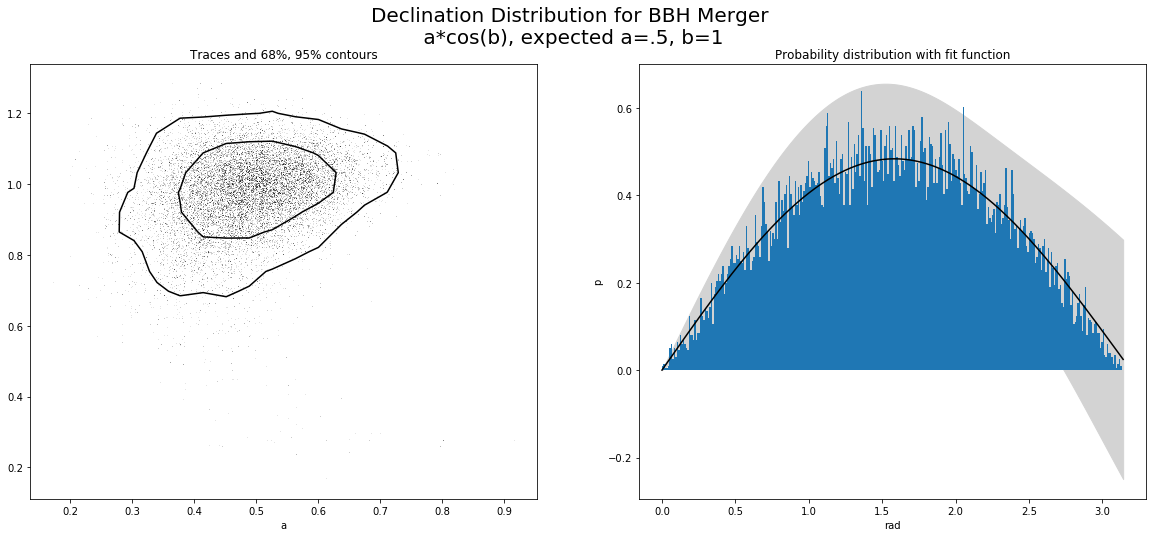

In [48]:
y_range_dec = np.pi
grad_dec= 100

xbins_dec = np.linspace(0,y_range_dec,grad_dec*(y_range_dec))

#random distribution
x=np.array(np.random.uniform(-1,1,size=num_events))
y_hist= np.arccos(x)

#binning to make scatterplot to curve fit
y_scatter, bins = np.histogram(y_hist,normed=True,bins=xbins_dec)
x_scatter = xbins_dec[:-1] + 0.5 * (xbins_dec[1:] - xbins_dec[:-1])

#priors
sig = mc.Uniform("sig", 0.0, 100.0, value=1.)
a = mc.Uniform("a",-1.0, 1.0, value= 0.0)
b = mc.Uniform("b", 0.0, 2.0, value= 1.0)

#model
@mc.deterministic(plot=False)
def sinusoidal(x=x_scatter, a=a, b=b):
      return a*np.sin(x*b)
    
#likelihood
y = mc.Normal("y", mu=sinusoidal, tau=1.0/sig**2, value=y_scatter, observed=True)

#sampling
mcmc = mc.MCMC([y, a, b])
mcmc.sample(iter=50000, burn=20000)

# plotting
pymc_trace = [mcmc.trace('a')[:],
              mcmc.trace('b')[:]]
title="Declination Distribution for BBH Merger\n a*cos(b), expected a=.5, b=1"
plot_MCMC_results(y_hist,pymc_trace,model="sin",units=["rad","p"],title=title,bins=xbins_dec)
plt.show()

Inclination angle, uniform in $\cos(\iota), \iota \in [0,\pi]$

/Users/RMastandrea/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


 [-----------------100%-----------------] 50000 of 50000 complete in 5.2 sec

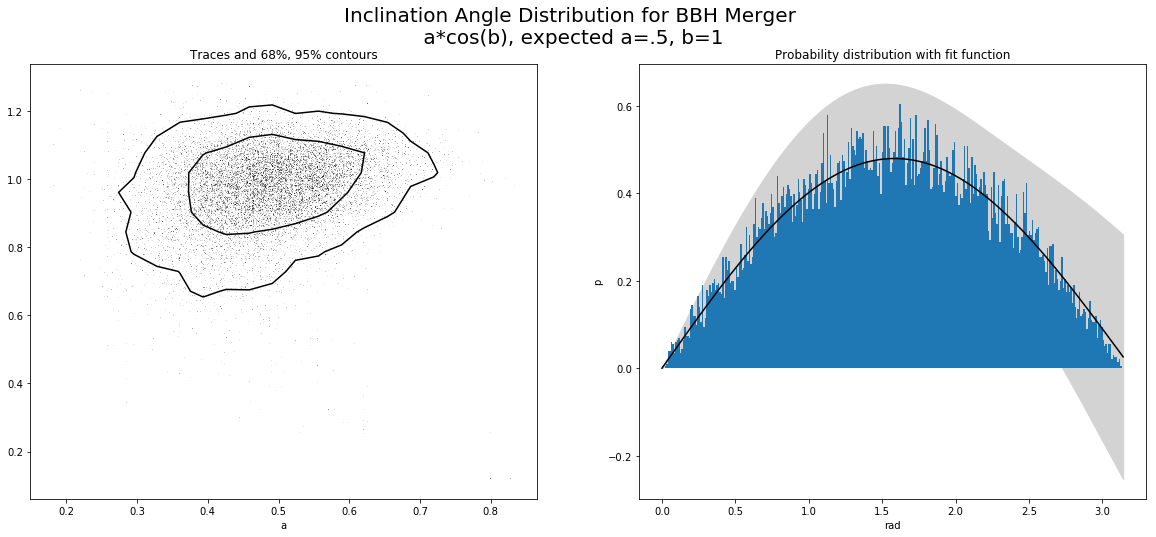

In [49]:
y_range_inc = np.pi
grad_inc= 100

xbins_inc = np.linspace(0,y_range_inc,grad_inc*(y_range_inc))

#random distribution
x=np.array(np.random.uniform(-1,1,size=num_events))
y_hist= np.arccos(x)

#binning to make scatterplot to curve fit
y_scatter, bins = np.histogram(y_hist,normed=True,bins=xbins_inc)
x_scatter = xbins_inc[:-1] + 0.5 * (xbins_inc[1:] - xbins_inc[:-1])

#priors
sig = mc.Uniform("sig", 0.0, 100.0, value=1.)
a = mc.Uniform("a",-1.0, 1.0, value= 0.0)
b = mc.Uniform("b", 0.0, 2.0, value= 1.0)

#model
@mc.deterministic(plot=False)
def sinusoidal(x=x_scatter, a=a, b=b):
      return a*np.sin(x*b)
    
#likelihood
y = mc.Normal("y", mu=sinusoidal, tau=1.0/sig**2, value=y_scatter, observed=True)

#sampling
mcmc = mc.MCMC([y, a, b])
mcmc.sample(iter=50000, burn=20000)

# plotting
pymc_trace = [mcmc.trace('a')[:],
              mcmc.trace('b')[:]]
title="Inclination Angle Distribution for BBH Merger\n a*cos(b), expected a=.5, b=1"
plot_MCMC_results(y_hist,pymc_trace,model="sin",units=["rad","p"],title=title,bins=xbins_inc)
plt.show()

Spin polar angles (*2), uniform in $\cos(\theta), \theta_1,\theta_2 \in [0,\pi]$

/Users/RMastandrea/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


 [-----------------100%-----------------] 50000 of 50000 complete in 6.6 sec

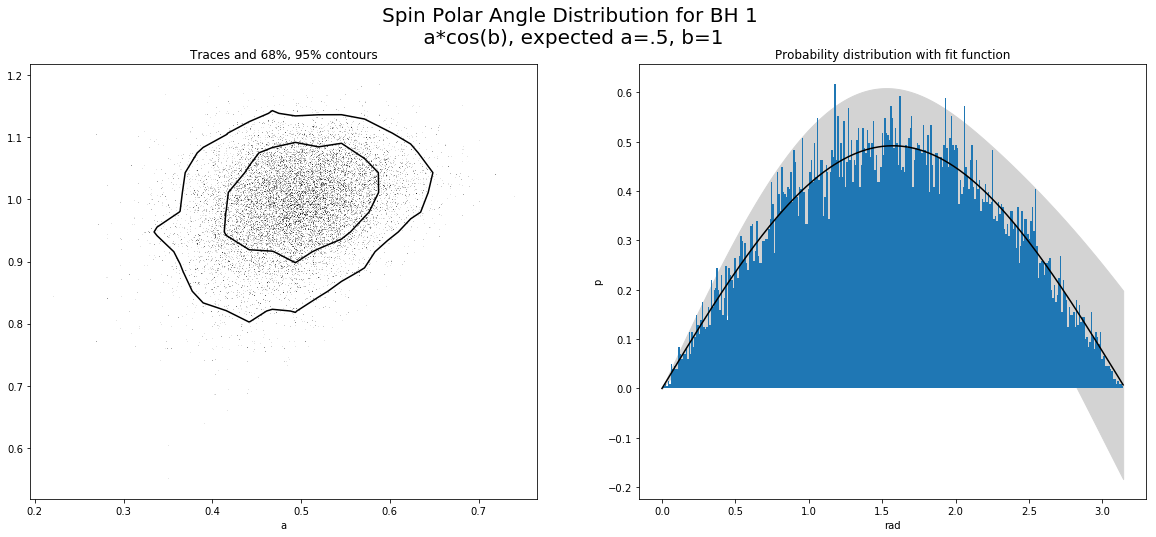

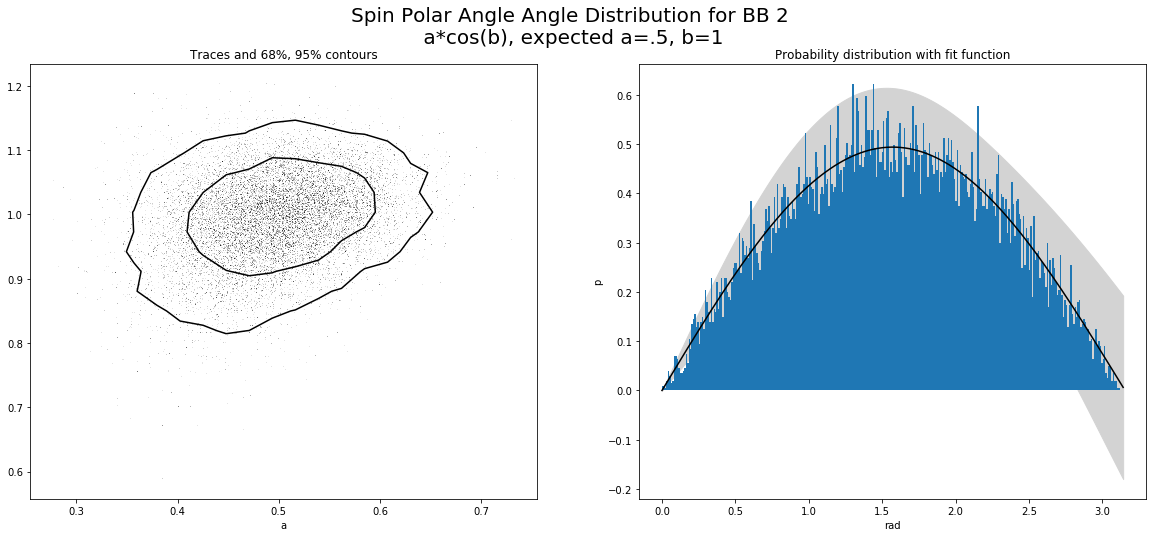

In [78]:
y_range_spin_pol = np.pi
grad_spin_pol= 100

xbins_spin_pol = np.linspace(0,y_range_spin_pol,grad_spin_pol*(y_range_spin_pol))

#random distribution
x_1=np.array(np.random.uniform(-1,1,size=num_events))
x_2=np.array(np.random.uniform(-1,1,size=num_events))
y_hist_1= np.arccos(x_1)
y_hist_2= np.arccos(x_2)

#binning to make scatterplot to curve fit
y_scatter_1, bins = np.histogram(y_hist_1,normed=True,bins=xbins_spin_pol)
y_scatter_2, bins = np.histogram(y_hist_2,normed=True,bins=xbins_spin_pol)
x_scatter = xbins_spin_pol[:-1] + 0.5 * (xbins_spin_pol[1:] - xbins_spin_pol[:-1])

#priors
sig = mc.Uniform("sig", 0.0, 100.0, value=1.)
a = mc.Uniform("a",-1.0, 1.0, value= 0.0)
b = mc.Uniform("b", 0.0, 2.0, value= 1.0)

#model
@mc.deterministic(plot=False)
def sinusoidal(x=x_scatter, a=a, b=b):
      return a*np.sin(x*b)
    
#likelihood
y_1 = mc.Normal("y", mu=sinusoidal, tau=1.0/sig**2, value=y_scatter_1, observed=True)
y_2 = mc.Normal("y", mu=sinusoidal, tau=1.0/sig**2, value=y_scatter_2, observed=True)

#sampling
mcmc_1 = mc.MCMC([y_1, a, b])
mcmc_1.sample(iter=50000, burn=20000)
mcmc_2 = mc.MCMC([y_2, a, b])
mcmc_2.sample(iter=50000, burn=20000)

# plotting
pymc_trace_1 = [mcmc_1.trace('a')[:],
              mcmc_1.trace('b')[:]]
title="Spin Polar Angle Distribution for BH 1\n a*cos(b), expected a=.5, b=1"
plot_MCMC_results(y_hist_1,pymc_trace_1,model="sin",units=["rad","p"],title=title,bins=xbins_spin_pol)
pymc_trace_2 = [mcmc_2.trace('a')[:],
              mcmc_2.trace('b')[:]]
title="Spin Polar Angle Angle Distribution for BB 2\n a*cos(b), expected a=.5, b=1"
plot_MCMC_results(y_hist_2,pymc_trace_2,model="sin",units=["rad","p"],title=title,bins=xbins_spin_pol)
plt.show()

Spin magnitudes (*2), gaussian with $\mu=.7,\sigma=.1$

 [-----------------100%-----------------] 50000 of 50000 complete in 9.3 sec

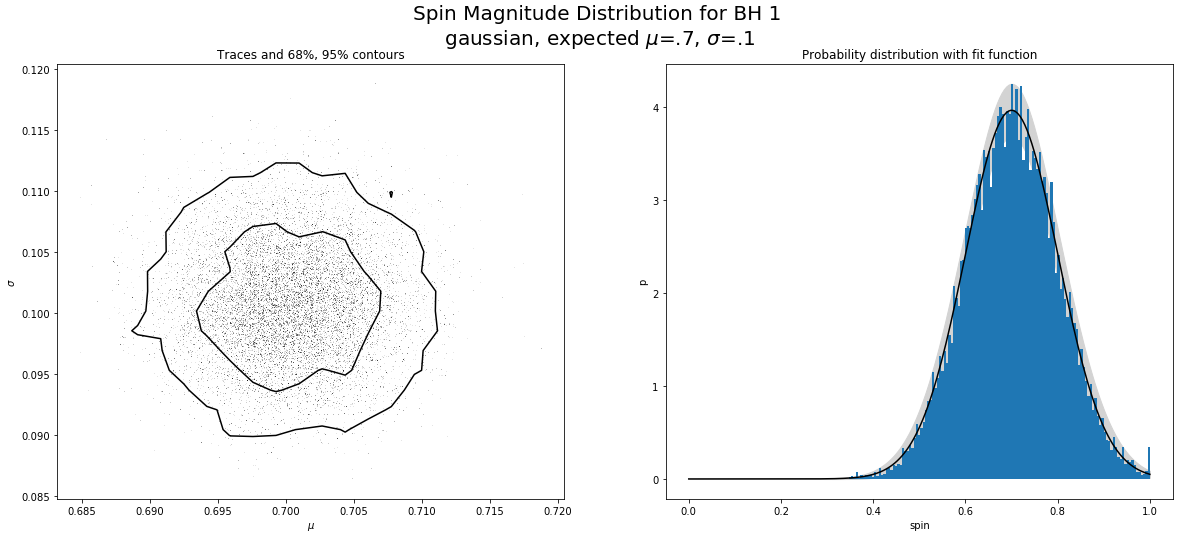

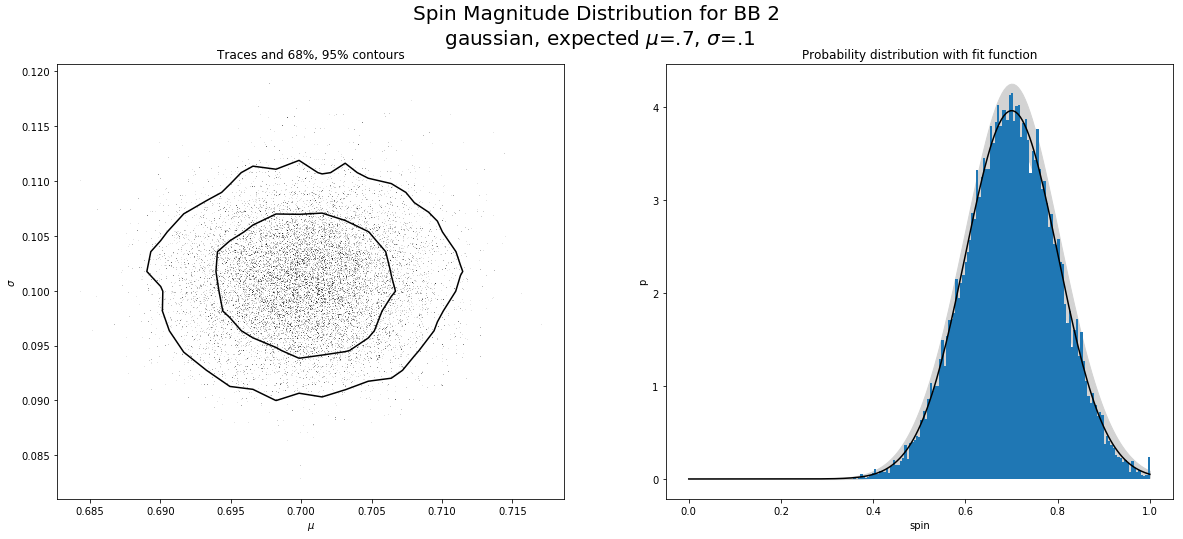

In [51]:
spin_mean=.7
spin_std_dev=.1
y_range_spin = 1
grad_spin=200

xbins_spin = np.linspace(0,y_range_spin,grad_spin*(y_range_spin))

class Spin_mag_pdf(rv_continuous):
    def _pdf(self, x):
        return (1.0/(2*np.pi*spin_std_dev**2)**.5)*np.exp(-(x-spin_mean)**2/(2*spin_std_dev**2))

#random distribution
spin_mag_pdf = Spin_mag_pdf(name="Spin mag distribution", a=0,b=1)
x_1=np.array(np.random.rand(num_events))
x_2=np.array(np.random.rand(num_events))
y_hist_1=spin_mag_pdf.ppf(x_1)
y_hist_2=spin_mag_pdf.ppf(x_2)

y_scatter_1,bins = np.histogram(y_hist_1,normed=True,bins=xbins_spin)
y_scatter_2,bins = np.histogram(y_hist_2,normed=True,bins=xbins_spin)
x_scatter = xbins_spin[:-1] + 0.5 * (xbins_spin[1:] - xbins_spin[:-1])

#priors
sig = mc.Uniform("sig", 0.0, 2.0, value=1.)
a = mc.Uniform("a", 0, 10.0, value= 5.0)
mean = mc.Uniform("mean", 0.0, 1.0, value= 0.5)
stddev = mc.Uniform("stddev", 0.0, 1.0, value= .5)

#model
@mc.deterministic(plot=False)
def gaussian(x=x_scatter, a=a, mean=mean,stddev=stddev):
      return a*np.exp(-(x-mean)**2/(2*stddev**2))
    
#likelihood
y_1 = mc.Normal("y", mu=gaussian, tau=1.0/sig**2, value=y_scatter_1, observed=True)
y_2 = mc.Normal("y", mu=gaussian, tau=1.0/sig**2, value=y_scatter_2, observed=True)

#sampling
mcmc_1 = mc.MCMC([y_1, a, mean, stddev])
mcmc_1.sample(iter=50000, burn=20000)
mcmc_2 = mc.MCMC([y_2, a, mean, stddev])
mcmc_2.sample(iter=50000, burn=20000)

# plotting
pymc_trace_1 = [mcmc_1.trace('a')[:],
              mcmc_1.trace('mean')[:],
              mcmc_1.trace('stddev')[:]]
title="Spin Magnitude Distribution for BH 1\n gaussian, expected $\mu$=.7, $\sigma$=.1"
plot_MCMC_results(y_hist_1,pymc_trace_1,model="gaussian",units=["spin","p"],title=title,bins=xbins_spin)
pymc_trace_2 = [mcmc_2.trace('a')[:],
              mcmc_2.trace('mean')[:],
              mcmc_2.trace('stddev')[:]]
title="Spin Magnitude Distribution for BB 2\n gaussian, expected $\mu$=.7, $\sigma$=.1"
plot_MCMC_results(y_hist_2,pymc_trace_2,model="gaussian",units=["spin","p"],title=title,bins=xbins_spin)
plt.show()

Distance, quadratic

 [-----------------100%-----------------] 50000 of 50000 complete in 4.6 sec

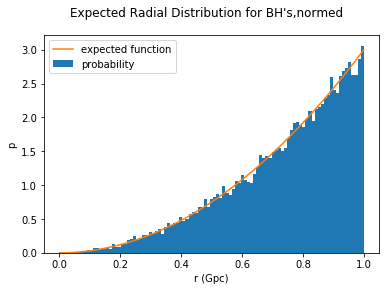

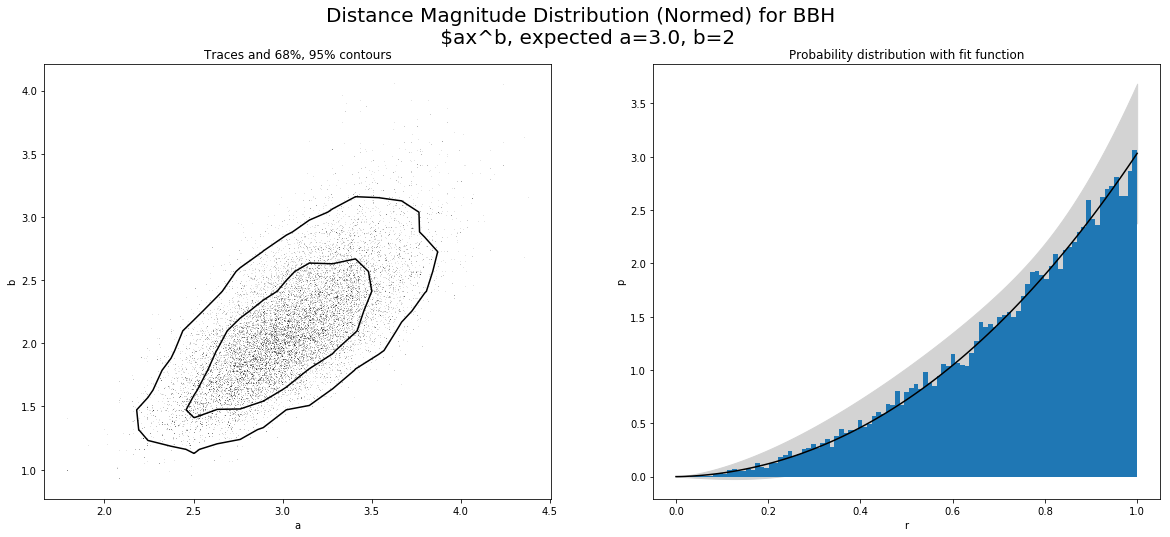

 [-----------------100%-----------------] 50000 of 50000 complete in 4.9 sec

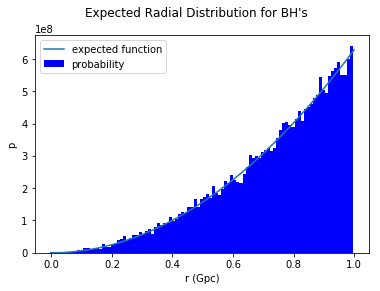

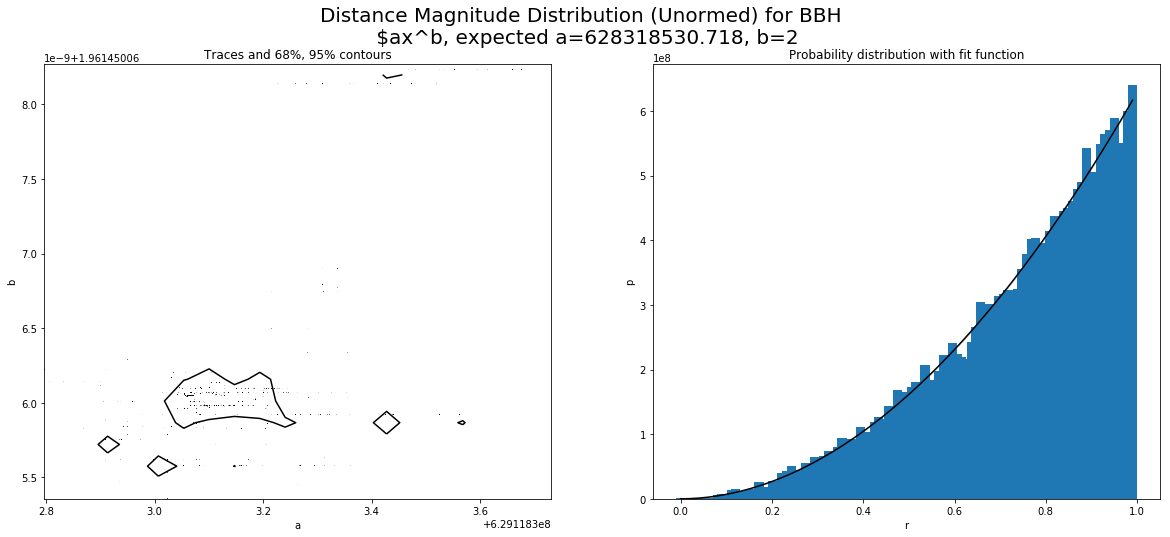

In [54]:
grad_dist=100
density = 50000000
horizon_dist = 1


'''
NORMED
'''

class Distance_pdf(rv_continuous):
    def _pdf(self, x):
        return 3.0*(x**2)*(1.0/horizon_dist)**3

xbins_dist = np.linspace(0,horizon_dist,grad_dist*(horizon_dist))

#random distribution
distance_pdf = Distance_pdf(name="Distance distribution", a=0,b=horizon_dist)
x=np.array(np.random.rand(num_events))
y_normed_hist=distance_pdf.ppf(x)

#actual distribution
y_act = 3.0*(1.0/horizon_dist)**3*(xbins_dist**2)


#FIGURE 18 - LINEAR X AXIS
fig18 = plt.figure(18)
ax18 = fig18.add_subplot(111)
plt.hist(y_normed_hist,normed=True,bins=xbins_dist,label="probability")
plt.plot(xbins_dist,y_act,label="expected function")
fig18.suptitle("Expected Radial Distribution for BH's,normed")
plt.ylabel("p")
plt.xlabel("r (Gpc)")
plt.legend(loc='upper left')


# onto bayesian stats
y_normed_scatter, bins = np.histogram(y_normed_hist,normed=True,bins=xbins_dist)
x_normed_scatter = xbins_dist[:-1] + 0.5 * (xbins_dist[1:] - xbins_dist[:-1])

#priors
sig = mc.Uniform("sig", 0.0, 100.0, value=1.)
a = mc.Uniform("a", 0., 5.0, value= 1.0)
b = mc.Uniform("b", 0., 5.0, value= 1.0)
 
#model
@mc.deterministic(plot=False)
def power(x=x_normed_scatter, a=a, b=b):
      return a*x**b
#likelihood
y = mc.Normal("y", mu=power, tau=1.0/sig**2, value=y_normed_scatter, observed=True)

#sampling
mcmc = mc.MCMC([y, a, b])
mcmc.sample(iter=50000, burn=25000)

# plot
pymc_trace = [mcmc.trace('a')[:],
              
              mcmc.trace('b')[:]]

title="Distance Magnitude Distribution (Normed) for BBH \n $ax^b, expected a="+str(3.0*(1.0/horizon_dist)**3)+", b=2"
plot_MCMC_results(y_normed_hist, pymc_trace,model="power law",units=["r","p"],title=title,bins=xbins_dist)
plt.show()




'''
NOW UNNORMED
'''

#random distribution
normed_value = (4.0/3)*np.pi*density*horizon_dist**3
hist, bins = np.histogram(y_normed_hist, bins=xbins_dist, density=True)
widths = np.diff(xbins_dist)
hist *= normed_value

#actual distribution
y_act = 4.0*np.pi*(xbins_dist**2)*density

#FIGURE 20 - LINEAR X AXIS
fig20 = plt.figure(20)
ax20 = fig20.add_subplot(111)
plt.bar(xbins_dist[:-1], hist, widths,label="probability",color="b")
plt.plot(xbins_dist,y_act,label="expected function")
fig20.suptitle("Expected Radial Distribution for BH's")
plt.ylabel("p")
plt.xlabel("r (Gpc)")
plt.legend(loc='upper left')

# onto bayesian stats
#y_scatter, bins = np.histogram(hist,bins=xbins_dist)
#x_normed_scatter = xbins_dist[:-1] + 0.5 * (xbins_dist[1:] - xbins_dist[:-1])

#priors
sig = mc.Uniform("sig", 0.0, 10.0, value=1.)
a = mc.Uniform("a", 600000000, 630000000, value= 610000000)
b = mc.Uniform("b", 1.5, 3.0, value= 2.0)

#model
@mc.deterministic(plot=False)
def power(x=xbins_dist[:-1], a=a, b=b):
      return a*x**b
#likelihood
y = mc.Normal("y", mu=power, tau=1.0/sig**2, value=hist, observed=True)

#sampling
mcmc = mc.MCMC([y, a, b])
mcmc.sample(iter=50000, burn=25000)

# plot
pymc_trace = [mcmc.trace('a')[:],
              mcmc.trace('b')[:]]
title="Distance Magnitude Distribution (Unormed) for BBH \n $ax^b, expected a="+str(4.0*np.pi*density)+", b=2"
plot_MCMC_results(hist, pymc_trace,model="power law",units=["r","p"],title=title,bins=xbins_dist[:-1],bar=True)
#title=r"Expected Mass Distribution for BH 1. Expected form: "r"$-2.35*x+.300$"
#plot_MCMC_results(x_scatter,m1_scatter,m_1, pymc_trace_1,model="power log",units=["m","p"],title=title,bins=logbins_mass)

plt.show()




Mass, $M_{tot}=$ Salpeter, $\eta=$ half-gaussian with $\mu=.25,\sigma=.05$

/Users/RMastandrea/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


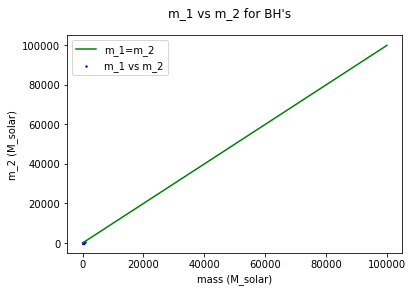

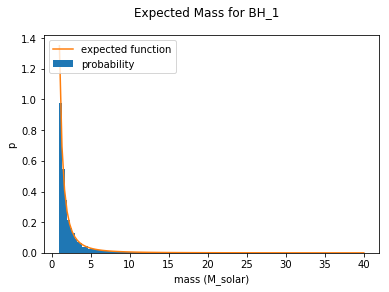

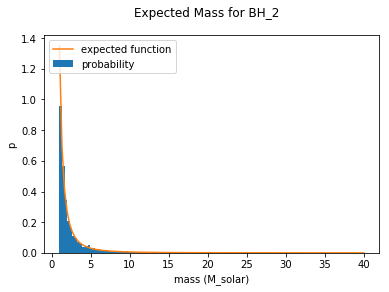

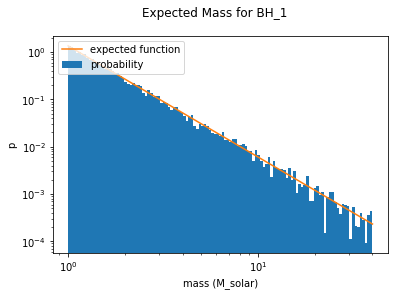

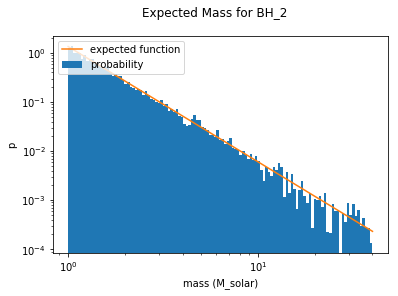

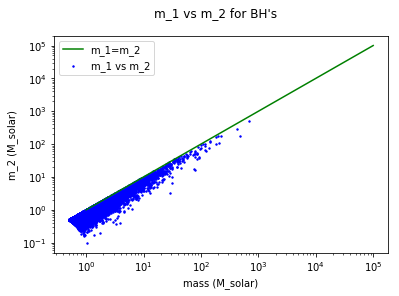

 [-----------------100%-----------------] 500000 of 500000 complete in 62.8 sec

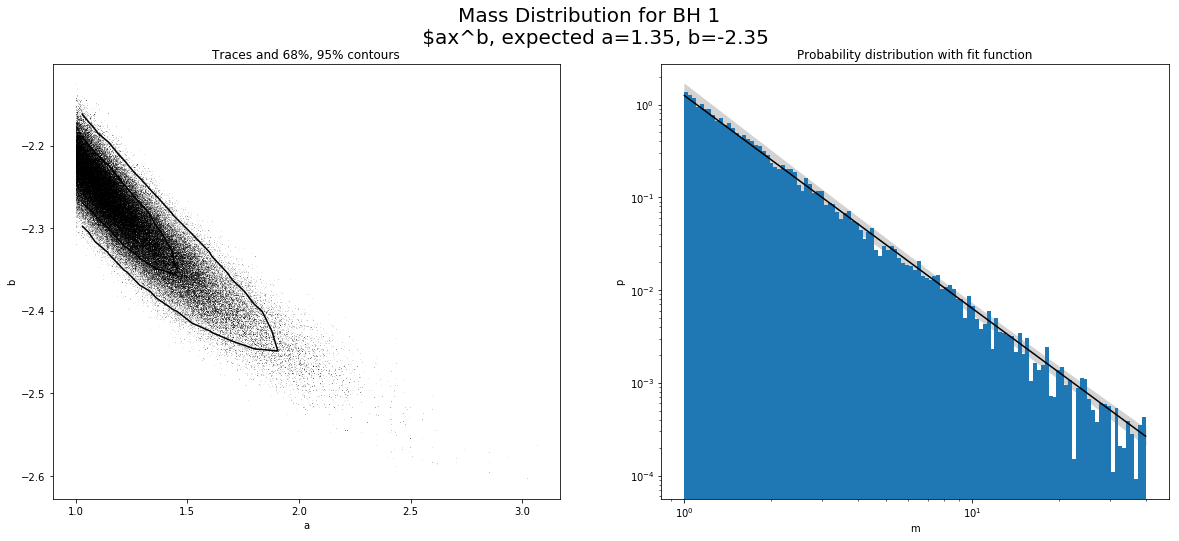

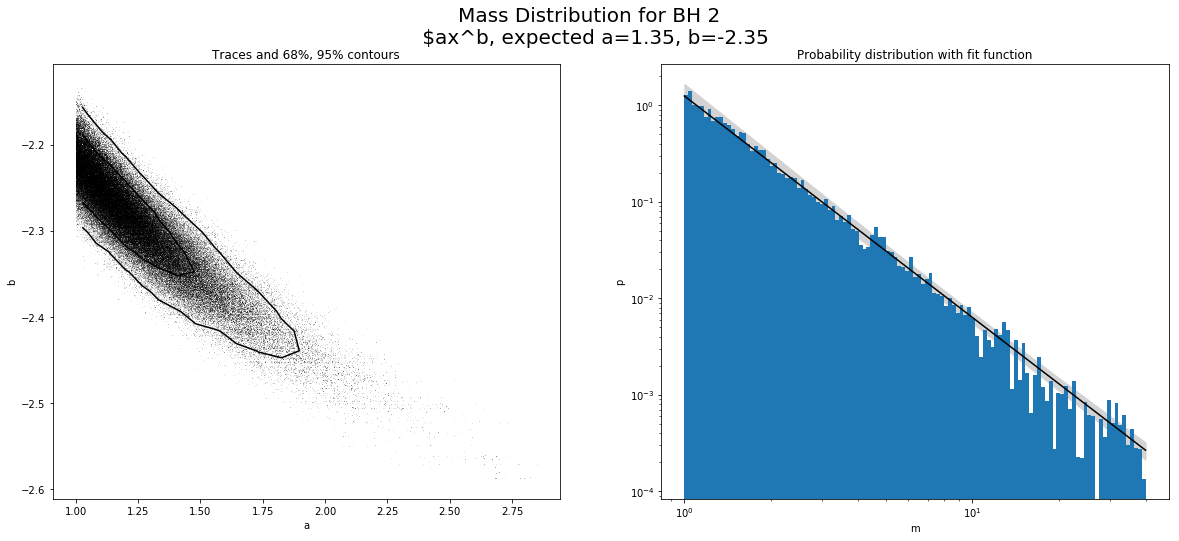

In [14]:
min_bh_mass = .5 #default: .5, realistically ~2.5
y_range_mass = 40
grad_mass=3
xbins_mass = np.linspace(1,y_range_mass,grad_mass*(y_range_mass))
logbins_mass = 10 ** np.linspace(np.log10(1), np.log10(y_range_mass), grad_mass*y_range_mass)

y_range_eta = .25
grad_eta=100
xbins_eta = np.linspace(0,y_range_eta,grad_eta*(y_range_eta))

class Mass_pdf(rv_continuous):
    def _pdf(self, x):
        return 1.35*((2*min_bh_mass)**(1.35))*(x**(-2.35))
    
#random distribution of total mass
mass_pdf = Mass_pdf(name="Mass distribution", a=2*min_bh_mass)
x_mtot=np.array(np.random.rand(num_events))
y_hist_mtot=mass_pdf.ppf(x_mtot) #y_rand_tot is the list of random masses

# NOW GENERATE ETA
eta_std_dev=.05
eta_mean=.25

class Eta_pdf(rv_continuous):
    def _pdf(self, x):
        return (2.0/(2*np.pi*eta_std_dev**2)**.5)*np.exp(-(x-eta_mean)**2/(2*eta_std_dev**2))
    
#random distribution of eta
eta_pdf = Eta_pdf(name="Eta distribution", a=0,b=.25)
x_eta=np.array(np.random.rand(num_events))
y_hist_eta=eta_pdf.ppf(x_eta) #y_rand_eta is the list of random etas


# CALCULATE M_1 AND M_2 AND PLOT
m_1 = .5*y_hist_mtot*(1+(1-4*y_hist_eta))
m_2 = .5*y_hist_mtot*(1-(1-4*y_hist_eta))

 

y_mass_act= 1.35*((2*min_bh_mass)**(1.35))*(xbins_mass**(-2.35))

y_range = 100000
xbins = np.linspace(1,y_range,grad_mass*(y_range))


#FIGURE 13 - LINEAR AXES
fig13 = plt.figure(13)
plt.scatter(m_1,m_2,color="b",label="m_1 vs m_2",s=2)
plt.plot(xbins,xbins,color="g",label="m_1=m_2")
fig13.suptitle("m_1 vs m_2 for BH's")
plt.ylabel("m_2 (M_solar)")
plt.xlabel("m_1 (M_solar)")
plt.xlabel("mass (M_solar)")
plt.legend(loc='upper left')


#FIGURE 14 - LINEAR AXES
fig14 = plt.figure(14)
ax14 = fig14.add_subplot(111)
plt.hist(m_1,normed=True,bins=xbins_mass,label="probability")
plt.plot(xbins_mass,y_mass_act,label="expected function")
fig14.suptitle("Expected Mass for BH_1")
plt.ylabel("p")
plt.xlabel("mass (M_solar)")
plt.legend(loc='upper left')

#FIGURE 15 - LINEAR AXES
fig15 = plt.figure(15)
ax15 = fig15.add_subplot(111)
plt.hist(m_2,normed=True,bins=xbins_mass,label="probability")
plt.plot(xbins_mass,y_mass_act,label="expected function")
fig15.suptitle("Expected Mass for BH_2")
plt.ylabel("p")
plt.xlabel("mass (M_solar)")
plt.legend(loc='upper left')

#FIGURE 16 - LOG AXES
fig16 = plt.figure(16)
ax16 = fig16.add_subplot(111)
plt.hist(m_1,normed=True,bins=logbins_mass,label="probability")
plt.plot(xbins_mass,y_mass_act,label="expected function")
fig16.suptitle("Expected Mass for BH_1")
plt.ylabel("p")
plt.gca().set_xscale("log")
plt.yscale('log', nonposy='clip')
plt.xlabel("mass (M_solar)")
plt.legend(loc='upper left')

#FIGURE 17 - LOG AXES
fig17 = plt.figure(17)
ax17 = fig17.add_subplot(111)
plt.hist(m_2,normed=True,bins=logbins_mass,label="probability")
plt.plot(xbins_mass,y_mass_act,label="expected function")
fig17.suptitle("Expected Mass for BH_2")
plt.ylabel("p")
plt.gca().set_xscale("log")
plt.yscale('log', nonposy='clip')
plt.xlabel("mass (M_solar)")
plt.legend(loc='upper left')

#FIGURE 18 - LOG AXES
fig18 = plt.figure(18)
plt.scatter(m_1,m_2,color="b",label="m_1 vs m_2",s=2)
plt.plot(xbins,xbins,color="g",label="m_1=m_2")
fig18.suptitle("m_1 vs m_2 for BH's")
plt.ylabel("m_2 (M_solar)")
plt.xlabel("m_1 (M_solar)")
plt.gca().set_xscale("log")
plt.yscale('log', nonposy='clip')
plt.xlabel("mass (M_solar)")
plt.legend(loc='upper left')

plt.show()


# onto bayesian stats
m1_scatter, bins = np.histogram(m_1,normed=True,bins=xbins_mass)
m2_scatter, bins = np.histogram(m_2,normed=True,bins=xbins_mass)
x = xbins_mass[:-1] + 0.5 * (xbins_mass[1:] - xbins_mass[:-1])

x_1_scatter=x[m1_scatter.nonzero()]
m1_scatter=m1_scatter[m1_scatter.nonzero()]

x_2_scatter=x[m2_scatter.nonzero()]
m2_scatter=m2_scatter[m2_scatter.nonzero()]


#priors
sig = mc.Poisson("sig", 10., value=1.)
a = mc.Uniform("a", 0.0, 2.0, value= 1.0)
b = mc.Uniform("b", -5.0, -1.0, value= -3.0)


#model
@mc.deterministic(plot=False)
def linear(x=np.log(x_1_scatter), a=a, b=b):
      return b*x+a
#likelihood
y_1 = mc.Normal("y", mu=linear, tau=1.0/sig**2, value=np.log(m1_scatter), observed=True)

#model
@mc.deterministic(plot=False)
def linear(x=np.log(x_2_scatter), a=a, b=b):
      return b*x+a
#likelihood
y_2 = mc.Normal("y", mu=linear, tau=1.0/sig**2, value=np.log(m2_scatter), observed=True)

#sampling
mcmc_1 = mc.MCMC([y_1, a, b])
mcmc_1.sample(iter=500000, burn=250000)

mcmc_2 = mc.MCMC([y_2, a, b])
mcmc_2.sample(iter=500000, burn=250000)

# plot
pymc_trace_1 = [mcmc_1.trace('a')[:],
              mcmc_1.trace('b')[:]]

title="Mass Distribution for BH 1 \n $ax^b, expected a="+str(1.35*((2*min_bh_mass)**1.35))+", b=-2.35"
plot_MCMC_results(m_1, pymc_trace_1,model="power log",units=["m","p"],title=title,bins=logbins_mass)


pymc_trace_2 = [mcmc_2.trace('a')[:],
              mcmc_2.trace('b')[:]]
title="Mass Distribution for BH 2 \n $ax^b, expected a="+str(1.35*((2*min_bh_mass)**1.35))+", b=-2.35"
plot_MCMC_results(m_2, pymc_trace_2,model="power log",units=["m","p"],title=title,bins=logbins_mass)


plt.show()





Coalesence time

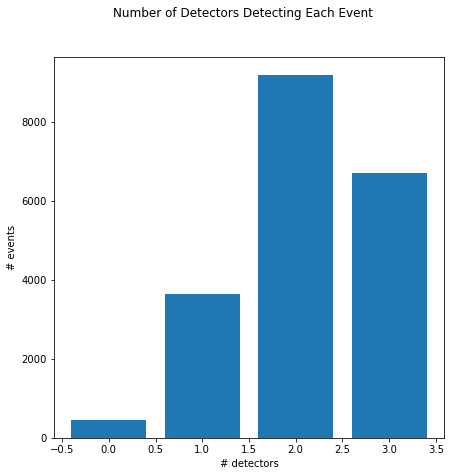

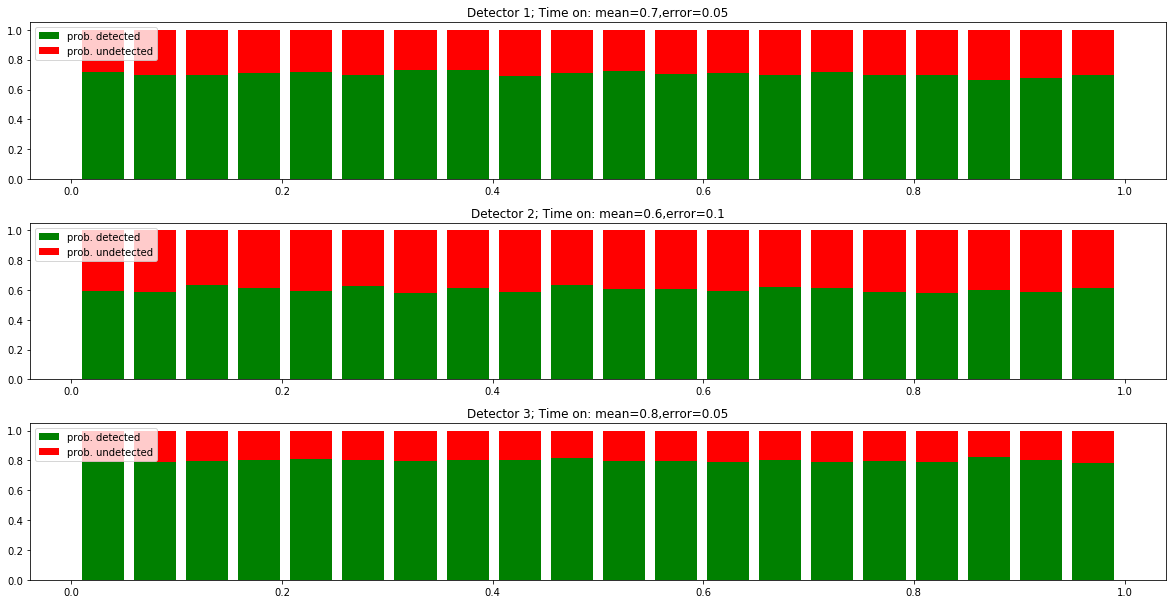

In [77]:
t_obs = 1
grad_t = 200
percent_on = [.7,.6,.8]
error = [.05,.1,.05]
num_detectors=len(percent_on)

xbins = np.linspace(0,t_obs,grad_t*(t_obs))
event_time = np.array(np.random.uniform(0,1,size=num_events))

detected={}
for i in range(num_detectors):
    event = np.array(np.random.uniform(0,1,size=num_events))
    y_detected=event<np.random.normal(percent_on[i], error[i], size=num_events)
    detected[i+1]=y_detected*1
    detected[i+1].astype(float)

num_detectors_per_event=np.zeros((1,num_events))
for i in range(num_detectors):
    num_detectors_per_event+=detected[i+1]
num_detectors_per_event=num_detectors_per_event[0]

xbins = range(0,num_detectors+1)

y = []
for i in range(num_detectors+1):
    y.append(list(num_detectors_per_event).count(i))

fig12 = plt.figure(12)
fig12.set_size_inches(7, 7, forward=True)
ax12 = fig12.add_subplot(111)
plt.bar(xbins,y)
fig12.suptitle("Number of Detectors Detecting Each Event")
plt.ylabel("# events")
plt.xlabel("# detectors")
#text = "num events="+str(num_events)+"; num events detected="+str(num_detected)
#ax12.set_title(text,fontsize=9)
plt.legend(loc='upper left')

num_bars = 20.

x=np.linspace(0.03,.97,20)
fig13 = plt.figure(13)
fig13.set_size_inches(16.5, 8.5, forward=True)


for i in range(num_detectors):
    plt.subplot(num_detectors, 1, i+1)
    plt.tight_layout()
    title="Detector "+str(i+1)+"; Time on: mean="+str(percent_on[i])+",error="+str(error[i])
    plt.title(title)

    y = np.mean(detected[i+1].reshape(-1, int(num_events/num_bars)), axis=1)
    plt.bar(x,y,width=.04,color="g",label="prob. detected")
    plt.bar(x,1-y,width=.04,color="r",bottom=y,label="prob. undetected")
    plt.legend(loc='upper left')



plt.show()
